In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
#grafiklerin Jupyter hücreleri içinde doğrudan görüntülenmesini sağlar.

In [2]:
import warnings
warnings.simplefilter(action="ignore", category=Warning)

In [6]:
df=pd.read_csv("data/Automobile.csv")

In [7]:
df.describe() #sadece sayısal kolonlar üzeerinde işlem yapar.
df.shape #(satır,sütun)
len(df) #satır sayısı
df.columns #sütunlar
len(df.columns) #sütun sayısı
len(df.describe().columns) #describe sadece numeriklere bakar, kaç tane numarik sütun vardır

16

**Veri Ön İşleme**

In [8]:
#Her sütunda kaç farklı veri var
for col in df.columns:
    print(col, df[col].nunique())

car_ID 205
symboling 6
CarName 147
fueltype 2
aspiration 2
doornumber 2
carbody 5
drivewheel 3
enginelocation 2
wheelbase 53
carlength 75
carwidth 44
carheight 49
curbweight 171
enginetype 7
cylindernumber 7
enginesize 44
fuelsystem 8
boreratio 38
stroke 37
compressionratio 32
horsepower 59
peakrpm 23
citympg 29
highwaympg 30
price 189


In [9]:
#Kategorik sütunların değerlerini görüntüleme
for col in df.columns:
    values = []
    
    #kategorik olanlar
    if col not in df.describe().columns: #sayısal değilse demek
        for val in df[col].unique(): #unique=benzersiz, burada benzersiz değerleridöngü içinde dönüştür diyor yani her veriden 1 adet olacak şekilde
            values.append(val)
            
        print("{0} -> {1}".format(col,values))

CarName -> ['alfa-romero giulia', 'alfa-romero stelvio', 'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls', 'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)', 'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5', 'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300', 'dodge rampage', 'dodge challenger se', 'dodge d200', 'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)', 'dodge coronet custom', 'dodge dart custom', 'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc', 'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl', 'honda accord', 'honda civic 1300', 'honda prelude', 'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ', 'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk', 'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4', 'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs', 'mazda glc 4', 'mazda glc custom l', 'mazda glc custom', 'buick electra 225 custom', 'buick century luxus (sw)'

In [10]:
df.CarName

0            alfa-romero giulia
1           alfa-romero stelvio
2      alfa-romero Quadrifoglio
3                   audi 100 ls
4                    audi 100ls
                 ...           
200             volvo 145e (sw)
201                 volvo 144ea
202                 volvo 244dl
203                   volvo 246
204                 volvo 264gl
Name: CarName, Length: 205, dtype: object

In [11]:
#Üetirici firma diye bir sutün oluşturduk
manufacturer = df['CarName'].apply(lambda x: x.split(' '))
manufacturer

0            [alfa-romero, giulia]
1           [alfa-romero, stelvio]
2      [alfa-romero, Quadrifoglio]
3                  [audi, 100, ls]
4                    [audi, 100ls]
                  ...             
200            [volvo, 145e, (sw)]
201                 [volvo, 144ea]
202                 [volvo, 244dl]
203                   [volvo, 246]
204                 [volvo, 264gl]
Name: CarName, Length: 205, dtype: object


manfucturer=üretici firma, apply komutu df üzerindeki her bir satır için döner.
apply fonksiyonu, "CarName" değişkenindeki her bir öğeyi alır, split fonksiyonunu 
kullanarak boşluk karakterine kadar böler ve sonuçları bir liste olarak döndürür.

manufacturer=df["CarName"].apply(lambda x: x.split(" ")) #split=bölme, boşluk karakterinden sonrasını alma.

lambda ifadesi, Python'da anonim (isimsiz) işlevler oluşturmak için kullanılan bir yapıdır. 
Bu yapı, tek satırda basit işlevler tanımlamak için kullanılır. Örneğin lambda arguments: expression
Bu kodda ise;x parametresini alır ve x üzerinde split(" ") işlemini uygular. Yani, x değerini boşluk karakterine göre böler. Bu işlem sonucunda oluşan listeyi geri döndürür.
Bu lambda ifadesi, apply() fonksiyonu içinde her bir CarName değeri için uygulanacak işlemi tanımlar. Yani, her bir CarName değeri üzerinde split(" ") işlemini gerçekleştirir 
ve sonuçları liste olarak döndürür.


In [12]:
#Sadece ilk elemanı almak için
manufacturer=df["CarName"].apply(lambda x: x.split(" ")[0])
manufacturer

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: CarName, Length: 205, dtype: object

In [13]:
#Orjinal datayı hiç değiştirmeden kopyalıyoruz
data= df.copy()

In [14]:
#CarName sütunu gereksiz diye çıkarıyoruz:
data.drop(columns=['CarName'], axis=1, inplace=True)
#Çıkarmak için pandasın drop fonsiyonunu kullanıyoruz, 
#Bir veri çerçevesinde axis=0 satırları temsil ederken, axis=1 sütunları temsil eder.
#Burada axis=1 y eksenindedir.Coloundur.
#Inplace=True ise orjinal datayı değiştir demektir. Yerine koy.

In [15]:
data.head(5)

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [16]:
#Oluşturduğumuz manufacturer adlı sütunu dtaya ekleyeceğiz.
data.insert(3, 'manufacturer', manufacturer) #Sırasıyla indexi, adını ve kendisini yazıyoruz.

In [18]:
# hangi üreticinin kaç adet aracı olduğuna bakıyorum
data.groupby(by='manufacturer').count()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
manufacturer,,,,,,,,,,,,,,,,,,,,,
Nissan,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
alfa-romero,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
audi,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
bmw,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
buick,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
chevrolet,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
dodge,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
honda,13,13,13,13,13,13,13,13,13,13,...,13,13,13,13,13,13,13,13,13,13
isuzu,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4


In [16]:
#Görüldüğü üzre marka adı yazılışlarında hata var ve birden fazla kez farklı şekillerde yazılmışlar bunları düzeltmrmiz gerekiyor.
#Öncelikle hepsini küçük harf yapalım
data.manufacturer = data.manufacturer.str.lower()
data.manufacturer.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [17]:
#Hatalı marka isimlerini düzletelim
data.replace({
     "maxda":"mazda",
     "porcshce":"porsche",
     "toyouta":"toyota",
     "vokswagen":"vw",
     "volkswagen":"vw"
}, inplace=True)
data.manufacturer.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'vw', 'volvo'], dtype=object)

***TEKLİ (Univariate) ANALİZ:***

Değişkenlere tek tek kendi içlerinde bakıp nasıl göründüğünü inceleme

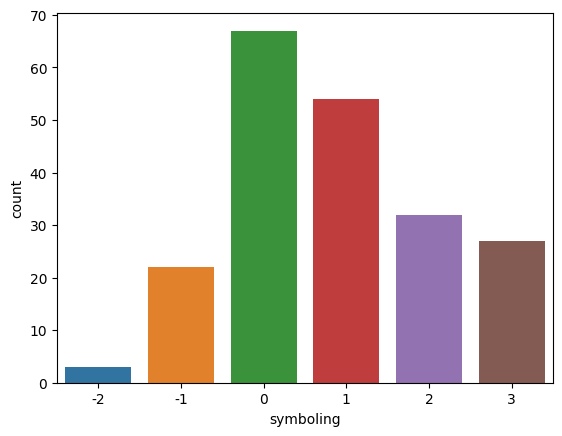

In [18]:
# 'symboling' sütunundaki kategorik değerlerin sayısını hesaplayalım
symboling_counts = data['symboling'].value_counts()

# countplot ile "symboling" sütununu görselleştir
sns.countplot(data=data, x='symboling')
plt.show()

In [19]:
data.head()

,car_ID,symboling,fueltype,manufacturer,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,gas,alfa-romero,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,gas,audi,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,gas,audi,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


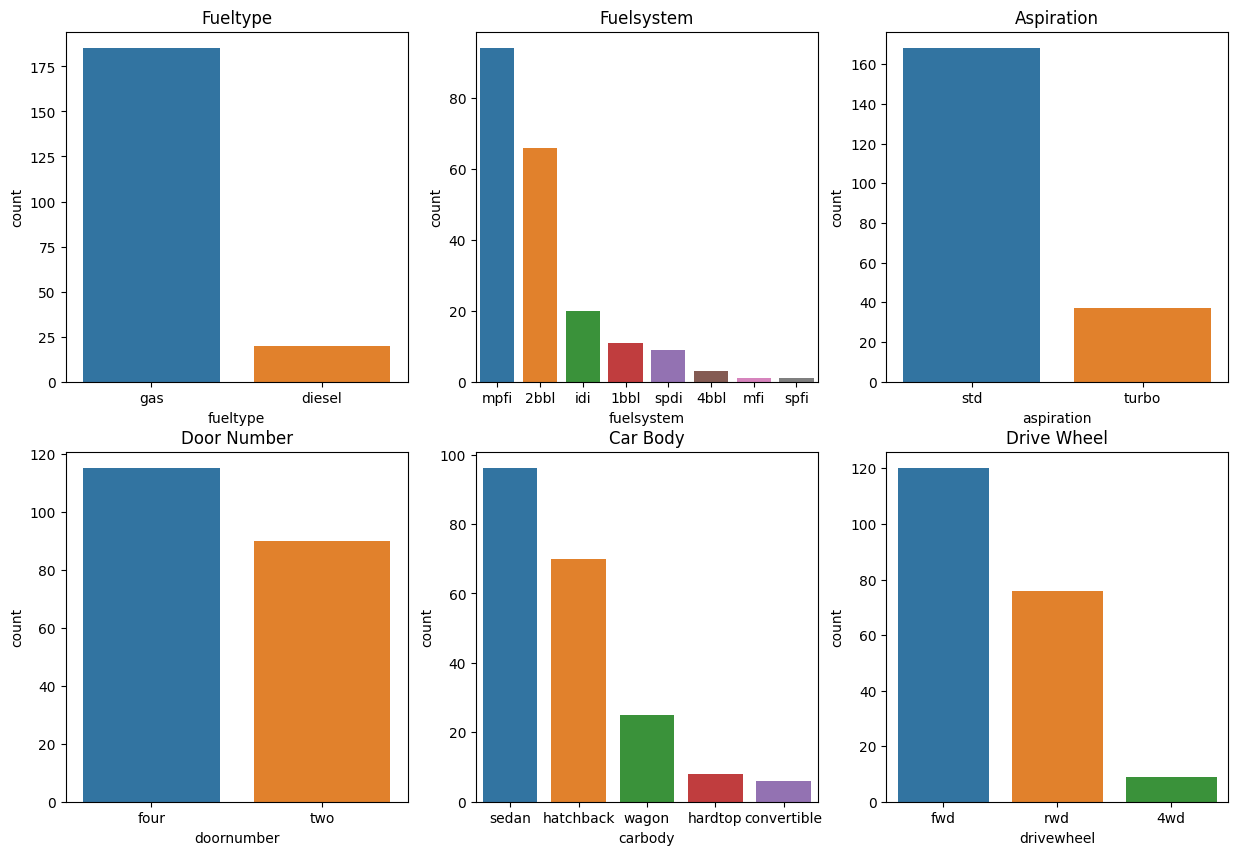

In [20]:

fig = plt.figure(figsize=(15,10))


# 'fueltype' sütunundaki kategorik değerlerin sayısını hesaplayalım
fueltype_counts = data['fueltype'].value_counts()

plt.subplot(2,3,1) 
#plt.subplot(2, 3, 2), 2 satır ve 3 sütundan oluşan bir grafik alanında, ikinci sırada ve ikinci sütunda yer alacak olan bir alt grafiği (subplot) oluşturur.
plt.title('Fueltype')
#sns.countplot(data.fueltype)
sns.countplot(data=data, x='fueltype', order=fueltype_counts.index)#order=sıralama
# benzinli (gas) arabalar çoğunlukta



# 'fuelsystem' sütunundaki kategorik değerlerin sayısını hesaplayalım
fuelsystem_counts = data['fuelsystem'].value_counts()

plt.subplot(2,3,2)
plt.title('Fuelsystem')
sns.countplot(data=data, x='fuelsystem', order=fuelsystem_counts.index)
# mpfi (multi point fuel injection) en çok tercih edilen, yeni teknoloji


# 'aspiration' sütunundaki kategorik değerlerin sayısını hesaplayalım
aspiration_counts = data['aspiration'].value_counts()

plt.subplot(2,3,3)
plt.title('Aspiration')
sns.countplot(data=data, x='aspiration', order=aspiration_counts.index)
# çoğunluk standart beslemeli


# 'Door Number' sütunundaki kategorik değerlerin sayısını hesaplayalım
door_counts = data['doornumber'].value_counts()

plt.subplot(2,3,4)
plt.title('Door Number')
sns.countplot(data=data, x='doornumber', order=door_counts.index)
# çoğunluk 4 kapılı


# 'carbody' sütunundaki kategorik değerlerin sayısını hesaplayalım
carbody_counts = data['carbody'].value_counts()

plt.subplot(2,3,5)
plt.title('Car Body')
sns.countplot(data=data, x='carbody', order=carbody_counts.index)
# çoğunluk sedan


# 'drivewheel' sütunundaki kategorik değerlerin sayısını hesaplayalım
drivewheel_counts = data['drivewheel'].value_counts()

plt.subplot(2,3,6)
plt.title('Drive Wheel')
sns.countplot(data=data, x='drivewheel', order=drivewheel_counts.index)
# çekiş sistemi, standart çeker çoğunlukta

plt.show()

#### İkili (Bivariate) Analiz

Şimdi değişkenlerin Fiyat'ı nasıl etkilediğini görmeye çalışalım:

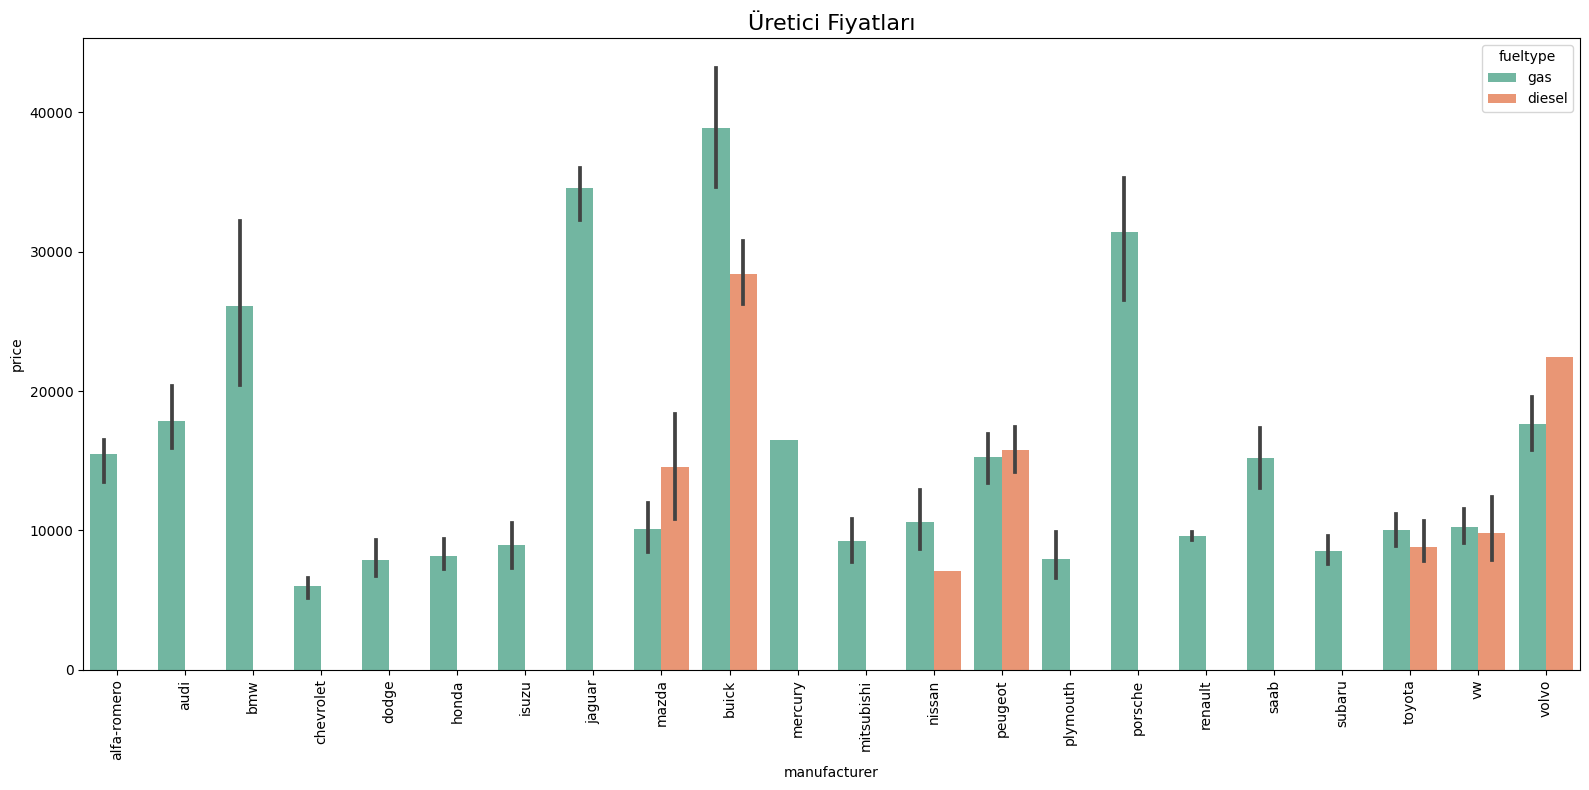

In [21]:
# Üretici bazlı ortalama fiyatlar

plt.figure(figsize=(16,8))
plt.title('Üretici Fiyatları', fontsize=16)
sns.barplot(x=data.manufacturer, y=data.price, 
            hue=data.fueltype, palette='Set2')

"""seaborn kütüphanesinin barplot fonksiyonunu kullanarak bir çubuk grafik 
oluşturur. x ve y parametreleri, hangi sütunların x ve y eksenlerinde yer 
alacağını belirler. hue parametresi ise çubukların farklı renklerde olmasını 
sağlayacak bir kategorik sütunu belirtir. Bu kodda, data.manufacturer sütunu 
x ekseni olarak, data.price sütunu y ekseni olarak ve data.fueltype sütunu 
ise çubukların farklı renklerle gösterilmesini sağlamak için kullanılır. 
palette='Set2' ifadesi, çubuk renklerinin Set2 paletini kullanacağını belirtir."""

plt.xticks(rotation=90) # Bu satır, x eksenindeki etiketleri 90 derece döndürmek için kullanılır. Bu genellikle, eksen üzerindeki etiketler çok uzunsa ve yatay olarak sığdırılamazsa kullanılır.
plt.tight_layout()#Bu yöntem, alt grafikler veya çizim öğeleri içeren bir ana grafikteki yerleşimi otomatik olarak düzenler. Bunu yaparken, alt grafikler arasında veya alt grafik ile grafik kenarları arasında daha iyi bir boşluk ayarlama yapar, böylece görsel olarak daha düzenli bir çıktı elde edilir.

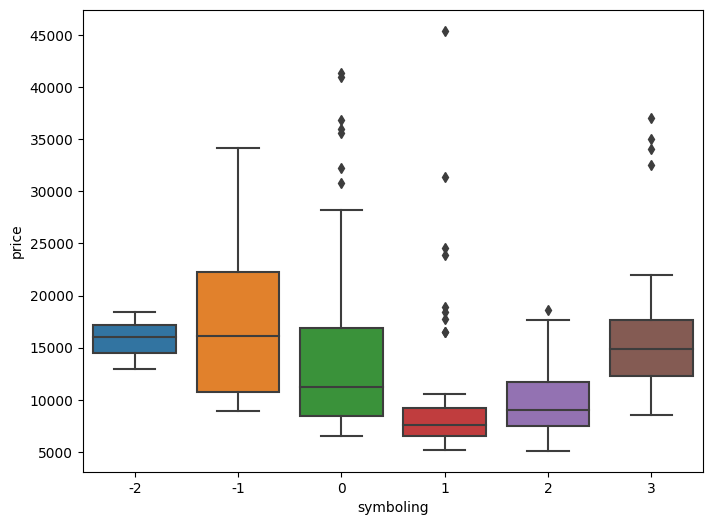

In [22]:
plt.figure(figsize=(8,6))
sns.boxplot(x=data.symboling, y=data.price)
plt.show()

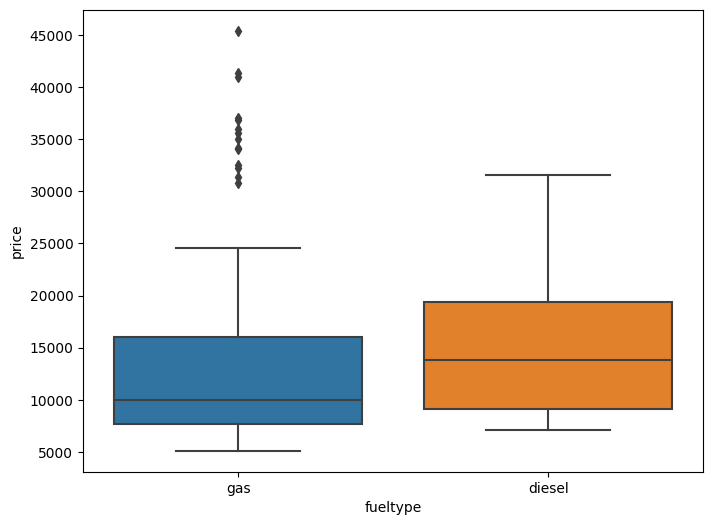

In [23]:
plt.figure(figsize=(8,6))
sns.boxplot(x=data.fueltype, y=data.price)
plt.show()

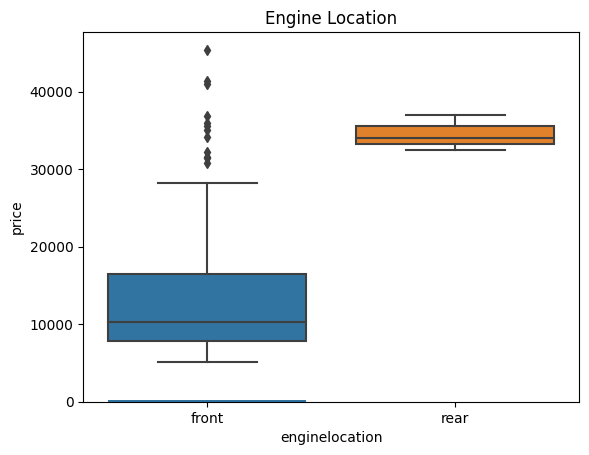

In [24]:
# 'enginelocation' sütunundaki kategorik değerlerin sayısını hesaplayalım
enginelocation_counts = data['enginelocation'].value_counts()


plt.title('Engine Location')
sns.countplot(data=data, x='enginelocation', order=enginelocation_counts.index)
sns.boxplot(x=data.enginelocation, y=data.price)
plt.show()

# çoğunlukla motoru önde olan arabalar var ve fiyatları daha düşük
# motor arkada ise fiyat çok yüksek oluyor

***cylindernumber:***

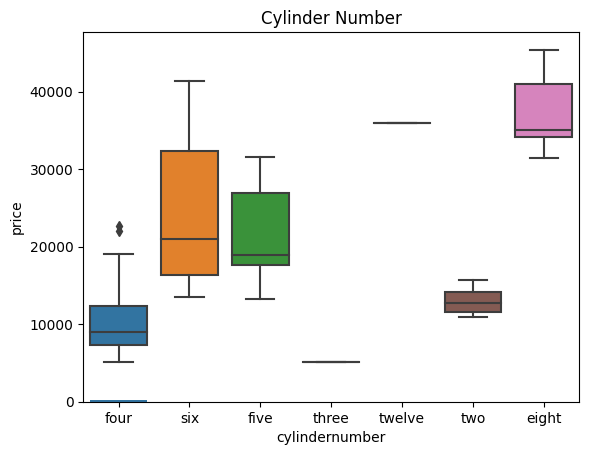

In [25]:
# 'enginelocation' sütunundaki kategorik değerlerin sayısını hesaplayalım
cylindernumber_counts = data['cylindernumber'].value_counts()


plt.title('Cylinder Number')
sns.countplot(data=data, x='cylindernumber', order=cylindernumber_counts.index)
sns.boxplot(x=data.cylindernumber, y=data.price)
plt.show()

# silindir sayısı arttıkça fiyatın görece arttığını söyleyebiliriz
# bakalım ne kadar dörğru çıkacak


***Fiyatın Kendi İçinde Dağılımı:***

Şimdi sadece fiyatın nasıl kümelendiğine bakalım:

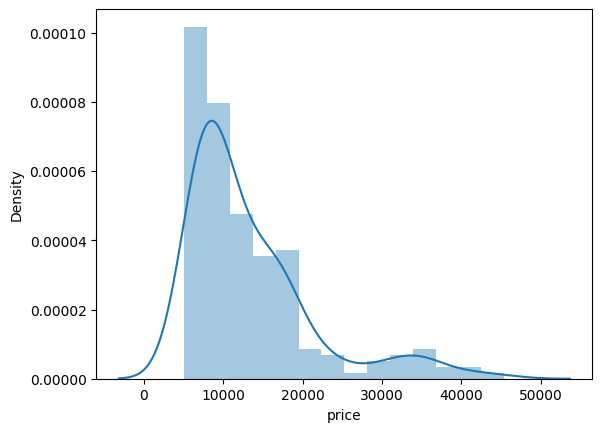

In [26]:
sns.distplot(data.price)#distribution plot (dağılım grafiği)
plt.show()

# fiyatın genelde 5.000 ile 20.000 USD arasında dağıldığı görülüyor

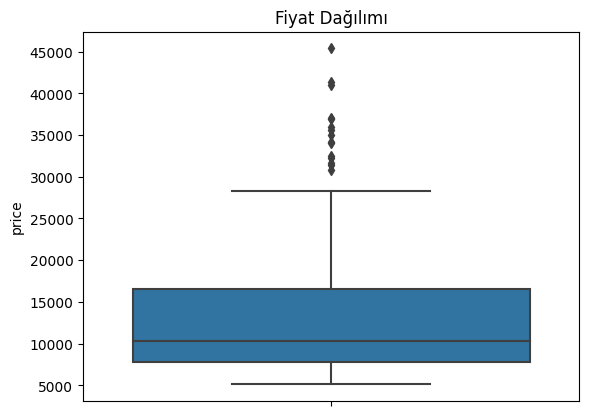

In [27]:
plt.title('Fiyat Dağılımı')
sns.boxplot(y=data.price)
plt.show()

# buradan da çok net bir şekilde dağılımın aralığı görülüyor

In [28]:
# fiyata istatistik veriler üzerinden bakalım

data.price.describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

In [29]:
data.columns

Index(['car_ID', 'symboling', 'fueltype', 'manufacturer', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [30]:
# sadece şunları alalım

cols = ['wheelbase', 'carlength', 'carwidth', 'carheight', 
        'curbweight', 'enginesize', 'boreratio', 'stroke',
        'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']

In [31]:
len(cols)

13

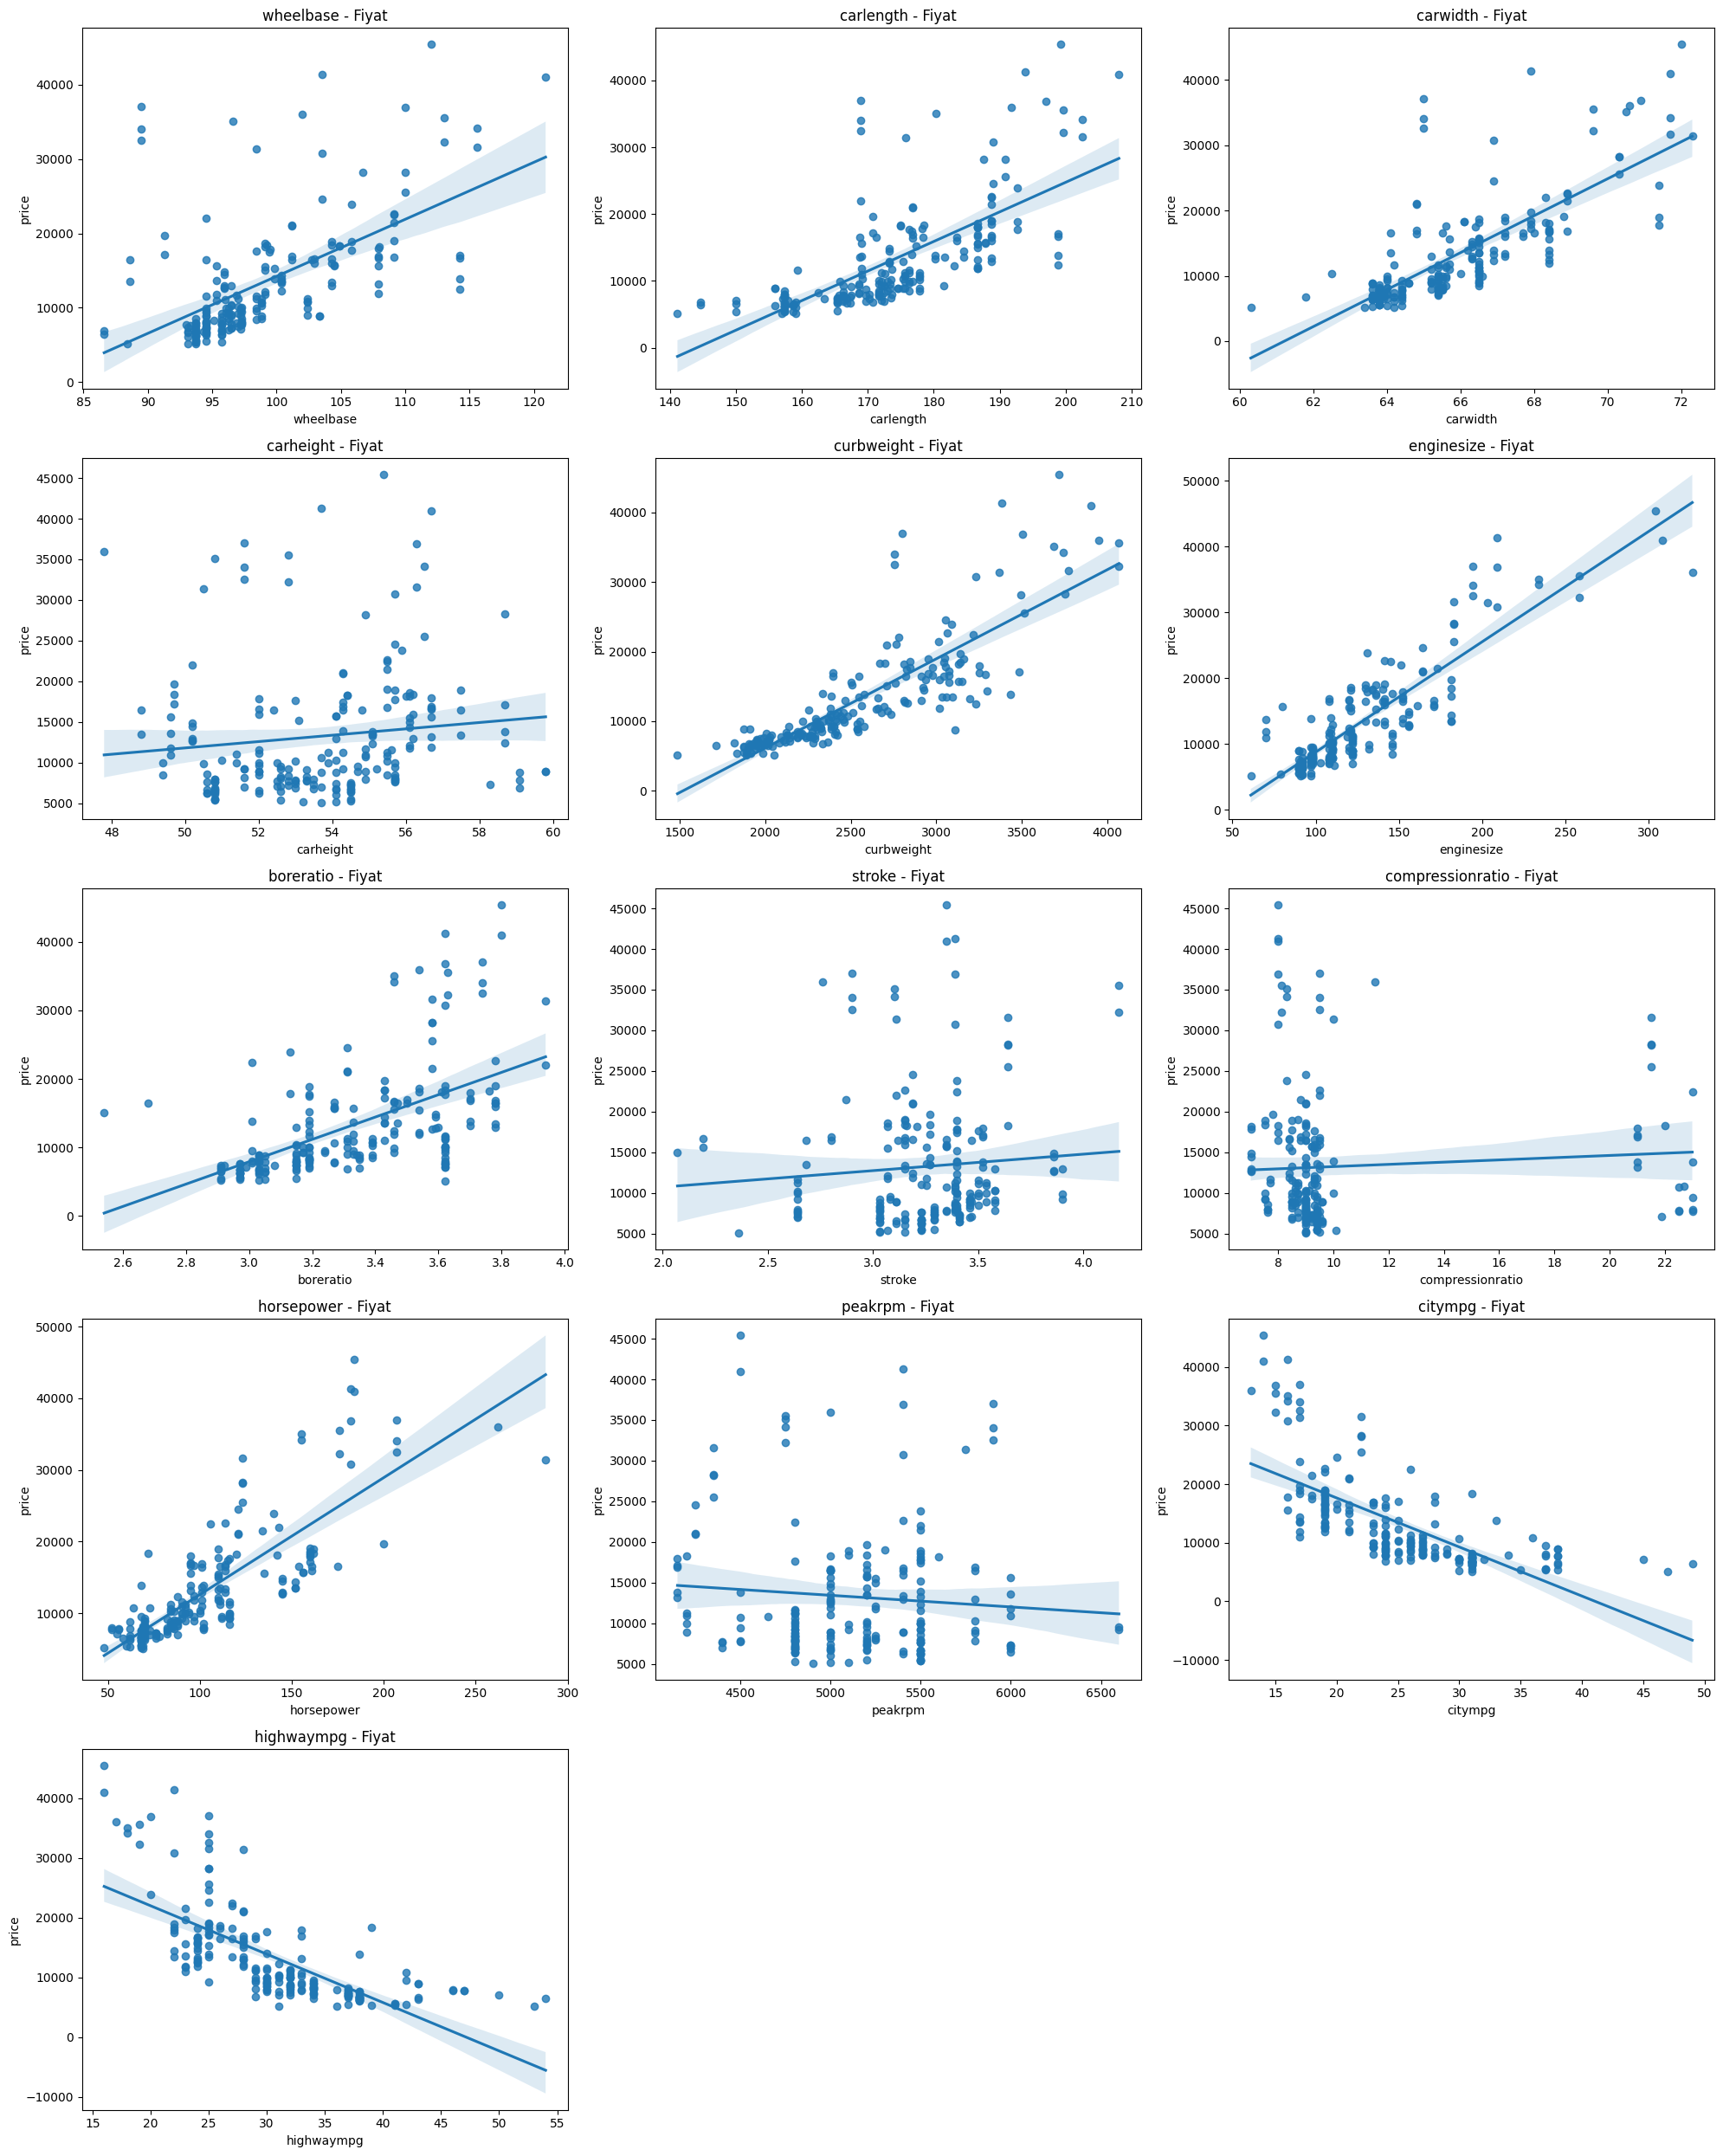

In [32]:
# regresyon doğruları ile ilişkiyi görelim

plt.figure(figsize=(20,25))

for i in range(len(cols)):
    plt.subplot(5,3,i+1)
    plt.title(cols[i] + ' - Fiyat')
    sns.regplot(x=eval('data' + '.' + cols[i]), y=data.price)# Burada, 'data' bir string olarak alınır ve ardından birleştirme operatörü olan nokta (.) ile diğer bir string olan cols[i] ifadesi ile birleştirilir. Bu, 'data' değişkeninin belirli bir sütununun değerine ulaşmak için kullanılır. cols[i] ifadesi, i indisine sahip bir sütun adını içerir.
    
plt.tight_layout()

Burada nerdeyse tüm değişkenleri önemli. Yani fiyat üzerinde etkisi olabilir.

Etkisiz olanlar:

carheight
stroke
compression ratio
peak rpm
highway mpg
city mpg
Bunları çıkarabiliriz.

In [33]:
data.columns

Index(['car_ID', 'symboling', 'fueltype', 'manufacturer', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [34]:
# yeni sütunlarla yeni data

data_new = data[[
        'car_ID', 'symboling', 'fueltype', 'manufacturer', 'aspiration',
        'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
        'carlength', 'carwidth', 'curbweight', 'enginetype', 'cylindernumber',
        'enginesize', 'fuelsystem', 'boreratio', 'horsepower', 'price']]

In [35]:
data_new.head()

,car_ID,symboling,fueltype,manufacturer,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,price
0,1,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,64.1,2548,dohc,four,130,mpfi,3.47,111,13495.0
1,2,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,64.1,2548,dohc,four,130,mpfi,3.47,111,16500.0
2,3,1,gas,alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,65.5,2823,ohcv,six,152,mpfi,2.68,154,16500.0
3,4,2,gas,audi,std,four,sedan,fwd,front,99.8,176.6,66.2,2337,ohc,four,109,mpfi,3.19,102,13950.0
4,5,2,gas,audi,std,four,sedan,4wd,front,99.4,176.6,66.4,2824,ohc,five,136,mpfi,3.19,115,17450.0


Şimdi data_new içindeki tüm sütunlara ikili olarak (pair-plot) bakalım:

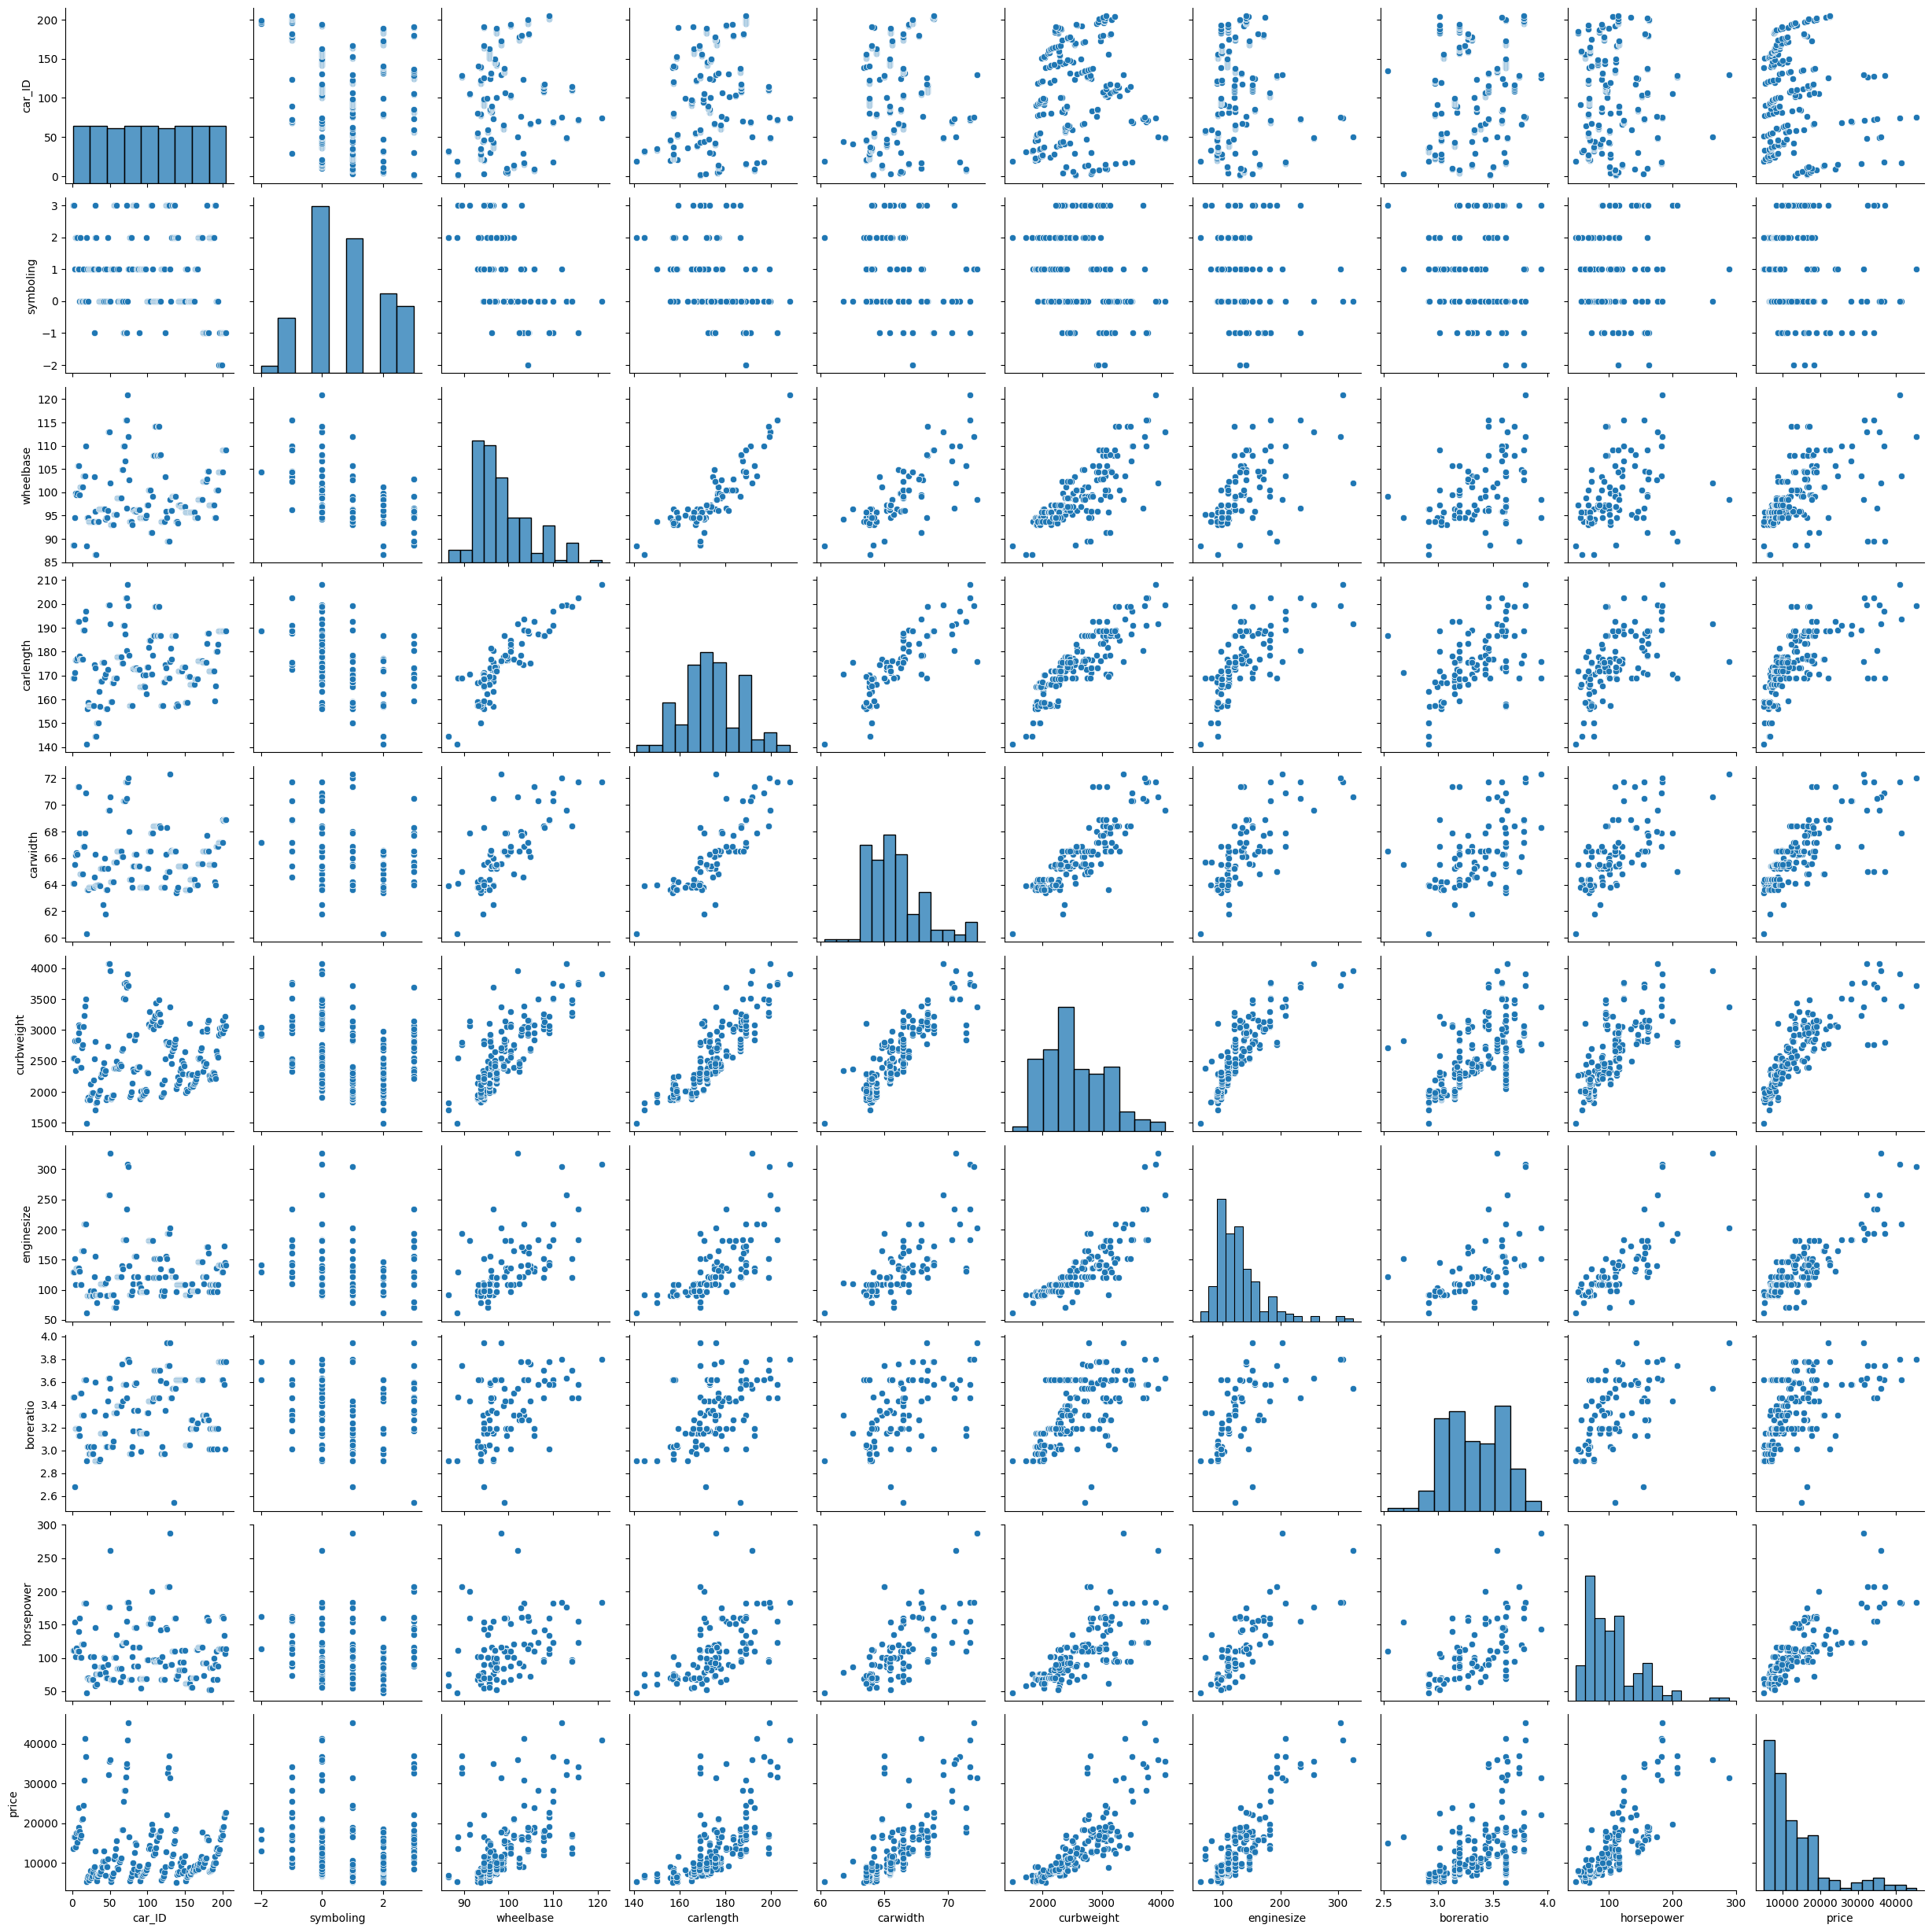

In [36]:
sns.pairplot(data_new)
plt.show()

3. DERS

***Feature Engineering***

Datayı daha iyi modellemek için yeni özellikler (feature) bulma veya özelliklerden bazılarını eleme işine ***Feature Engineering*** denir.

***Tork (Torque):*** Burada bulunan 2 sütunun değerleri kullanılarak farklı yeni bir sütun oluşturacağız. Tork, motorun dönme kuvvetinin; araçta tekerlekleri itme kuvvetine dönüştürülmesini sağlamaktadır. Yani bir nevi, aracın çekiş gücü ile ilgilidir.

Dolayısı ile Tork'u yüksek olan arabaların daha pahalı olması beklenebilir.

***Torque = 5252 x HP / RPM***

In [37]:
torque = data.horsepower * 5252 / data.peakrpm
torque

0      116.594400
1      116.594400
2      161.761600
3       97.400727
4      109.814545
          ...    
200    110.875556
201    158.550943
202    127.957818
203    115.981667
204    110.875556
Length: 205, dtype: float64

In [38]:
# dataya torque sütunu ekle

data.insert(10, 'torque', 
            pd.Series(data.horsepower * 5252 / data.peakrpm, index=data.index))#pd.Series, tek boyutlu, etiketlenmiş bir diziyi temsil eder.

In [39]:
data.torque

0      116.594400
1      116.594400
2      161.761600
3       97.400727
4      109.814545
          ...    
200    110.875556
201    158.550943
202    127.957818
203    115.981667
204    110.875556
Name: torque, Length: 205, dtype: float64

Torque ile Fiyat arasındaki ilişkiye bakalım:

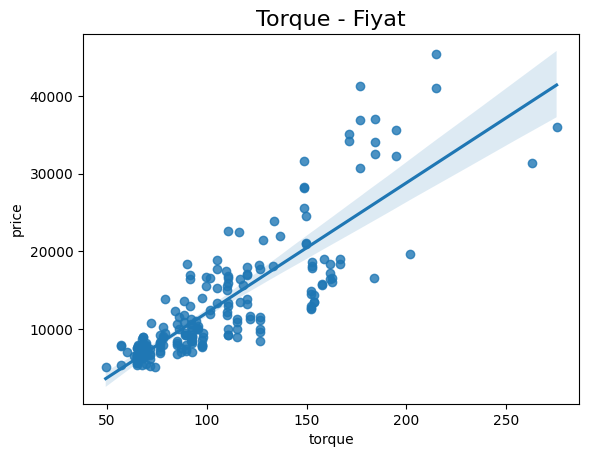

In [40]:
plt.title('Torque - Fiyat', fontsize=16)

sns.regplot(x=data.torque, y=data.price)

plt.show()

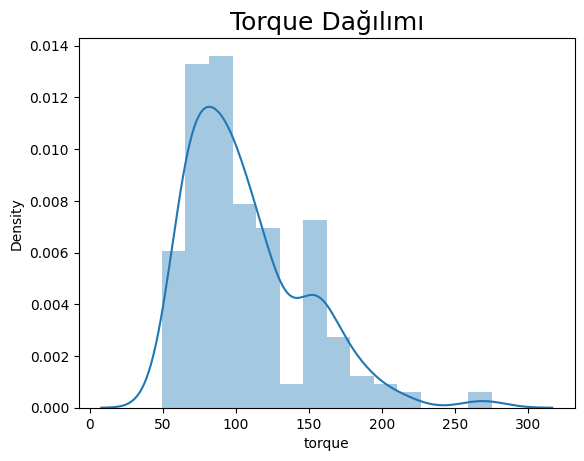

In [41]:
# Torque dağılımını görelim

plt.title('Torque Dağılımı', fontsize=18)
sns.distplot(data.torque) #Distribution plot (dağılım grafiği)

plt.show()

***Yakıt Ekonomisi:***

Arabanın şehir içinde ve şehir dışında ortalama yakıt tüketimi.

In [42]:
data['fueleconomy'] = (0.55 * data.citympg) + (0.45 * data.highwaympg)

In [43]:
data.fueleconomy

0      23.70
1      23.70
2      22.15
3      26.70
4      19.80
       ...  
200    25.25
201    21.70
202    20.25
203    26.45
204    21.70
Name: fueleconomy, Length: 205, dtype: float64

In [44]:
# silinecekleri sil

data.drop(columns=['car_ID','manufacturer','doornumber','carheight',
                   'compressionratio', 'symboling','stroke','citympg',
                   'highwaympg', 'fuelsystem', 'peakrpm'], 
          axis=1, inplace=True)

In [45]:
data.head()

,fueltype,aspiration,carbody,drivewheel,enginelocation,wheelbase,torque,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,price,fueleconomy
0,gas,std,convertible,rwd,front,88.6,116.594400,168.8,64.1,2548,dohc,four,130,3.47,111,13495.0,23.70
1,gas,std,convertible,rwd,front,88.6,116.594400,168.8,64.1,2548,dohc,four,130,3.47,111,16500.0,23.70
2,gas,std,hatchback,rwd,front,94.5,161.761600,171.2,65.5,2823,ohcv,six,152,2.68,154,16500.0,22.15
3,gas,std,sedan,fwd,front,99.8,97.400727,176.6,66.2,2337,ohc,four,109,3.19,102,13950.0,26.70
4,gas,std,sedan,4wd,front,99.4,109.814545,176.6,66.4,2824,ohc,five,136,3.19,115,17450.0,19.80


#### ***Model Tanımlama***

In [50]:
# data'yı kopayalalım

cars = data.copy()

Kategorik değişkenler için dummy variable'ları alalım:

***pd.get_dummies()***

In [51]:
# kategorik sütunlar

dummies_list = ['fueltype', 'aspiration', 'carbody','drivewheel',
                'enginelocation', 'enginetype', 'cylindernumber']

In [52]:

for i in dummies_list:
    
    temp_df = pd.get_dummies(eval('cars' + '.' + i), drop_first=True) #drop first ilk değişkeni eler. Mesela iki seçenek varsa birini alır o da baz değişkendir.
    #Baz değişken seçenekler uymadığında olandır.    
    cars = pd.concat([cars, temp_df], axis=1)#birleştirmek
    
    cars.drop([i], axis=1, inplace=True)

In [53]:
cars.head()

,wheelbase,torque,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,fueleconomy,...,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
0,88.6,116.594400,168.8,64.1,2548,130,3.47,111,13495.0,23.70,...,False,False,False,False,False,True,False,False,False,False
1,88.6,116.594400,168.8,64.1,2548,130,3.47,111,16500.0,23.70,...,False,False,False,False,False,True,False,False,False,False
2,94.5,161.761600,171.2,65.5,2823,152,2.68,154,16500.0,22.15,...,False,False,True,False,False,False,True,False,False,False
3,99.8,97.400727,176.6,66.2,2337,109,3.19,102,13950.0,26.70,...,True,False,False,False,False,True,False,False,False,False
4,99.4,109.814545,176.6,66.4,2824,136,3.19,115,17450.0,19.80,...,True,False,False,False,True,False,False,False,False,False


In [54]:
cars.shape

(205, 31)

In [55]:
# data'daki sütunlar

data.columns

Index(['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation',
       'wheelbase', 'torque', 'carlength', 'carwidth', 'curbweight',
       'enginetype', 'cylindernumber', 'enginesize', 'boreratio', 'horsepower',
       'price', 'fueleconomy'],
      dtype='object')

In [56]:
cars.columns

Index(['wheelbase', 'torque', 'carlength', 'carwidth', 'curbweight',
       'enginesize', 'boreratio', 'horsepower', 'price', 'fueleconomy', 'gas',
       'turbo', 'hardtop', 'hatchback', 'sedan', 'wagon', 'fwd', 'rwd', 'rear',
       'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor', 'five', 'four', 'six',
       'three', 'twelve', 'two'],
      dtype='object')

pd.get_dummies(drop_first=True) yaptığımız için verdiğimiz listedeki sütunlar için 1-0 (one-hot encoding) sütunları yarattı.

Her bir kategor için bir sütun olarak, sadece birer eksik olarak. (drop_first=True)

In [57]:
# std'yi atmış, sadece turbo adında bir sütun yaratmış
# baz değişken -> std

data.aspiration.unique()

array(['std', 'turbo'], dtype=object)

In [58]:
# convertible'ı atmış, diğerleri için sütun yaratmış
# baz değişken -> convertible

data.carbody.unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [59]:
# 4wd'yi atmış, diğerleri için sütun yaratmış 
# baz değişken -> 4wd

data.drivewheel.unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [60]:
# eight'i atmış diğerlerini almış
# baz değişken -> eight

data.cylindernumber.unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

##### Train-Test Split

In [61]:
from sklearn.model_selection import train_test_split

In [63]:
train_data, test_data= train_test_split(cars, train_size=0.7, random_state=42)

In [66]:
train_data.head()

,wheelbase,torque,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,fueleconomy,...,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
177,102.4,115.043810,175.6,66.5,2458,122,3.31,92,11248.0,29.25,...,True,False,False,False,False,True,False,False,False,False
75,102.7,183.820000,178.4,68.0,2910,140,3.78,175,16503.0,21.25,...,True,False,False,False,False,True,False,False,False,False
174,102.4,85.199111,175.6,66.5,2480,110,3.27,73,10698.0,31.35,...,True,False,False,False,False,True,False,False,False,False
31,86.6,66.525333,144.6,63.9,1819,92,2.91,76,6855.0,34.15,...,True,False,False,False,False,True,False,False,False,False
12,101.2,149.527529,176.8,64.8,2710,164,3.31,121,20970.0,24.15,...,True,False,False,False,False,False,True,False,False,False


In [68]:
test_data.head()

,wheelbase,torque,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,fueleconomy,...,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
15,103.5,177.011852,189.0,66.9,3230,209,3.62,182,30760.000,18.70,...,True,False,False,False,False,False,True,False,False,False
9,99.5,152.785455,178.2,67.9,3053,131,3.13,160,17859.167,18.70,...,True,False,False,False,True,False,False,False,False,False
100,97.2,97.970000,173.4,65.2,2302,120,3.33,97,9549.000,30.15,...,True,False,False,False,False,True,False,False,False,False
132,99.1,110.041905,186.6,66.5,2658,121,3.54,110,11850.000,24.15,...,True,False,False,False,False,True,False,False,False,False
68,110.0,148.504828,190.9,70.3,3750,183,3.58,123,28248.000,23.35,...,True,False,False,False,True,False,False,False,False,False


**Scaling**

Değişken boyutlarının farklı olması bir sorundur. Bunun için hepsi kendi içinde boyutlandırılır.

Min-Max Scaling -> 0 ile 1 arasında yeniden boyutlar:
𝑋𝑠𝑐𝑎𝑙𝑒𝑑=(𝑋−𝑋𝑚𝑖𝑛)/(𝑋𝑚𝑎𝑥−𝑋𝑚𝑖𝑛)
 
burada:

𝑋𝑚𝑖𝑛𝑆𝑐𝑎𝑙𝑒𝑑=0
 
ve

𝑋𝑚𝑎𝑥𝑆𝑐𝑎𝑙𝑒𝑑=1
 
olur.

Bu kodlar, verinin belirli özelliklerini Min-Max ölçeklendirme yöntemiyle [0, 1] aralığına getirerek, farklı özelliklerin farklı büyüklüklerinden kaynaklanabilecek olası sorunları gidermeyi amaçlar.

In [69]:
from sklearn.preprocessing import MinMaxScaler ##Min-Max ölçeklendirme, verinin her özelliğini belirli bir aralığa (genellikle [0, 1] veya [-1, 1]) getirir.

In [70]:
scaler = MinMaxScaler()#sınıftan bir örnek oluşturur

In [71]:
# numerik kolonları scale edelim
# price hariç -> price (y) değişkeni scale edilmez

scale_cols = ['wheelbase', 'torque','carlength','carwidth','curbweight',
              'enginesize', 'horsepower','fueleconomy','boreratio']  
#Ölçeklendirme yapılacak sütunların adlarını içeren bir liste oluşturur. Bu sütunlar, belirli özellikleri temsil eder.

In [73]:
train_data[scale_cols]= scaler.fit_transform(train_data[scale_cols])

In [75]:
train_data.head()

,wheelbase,torque,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,fueleconomy,...,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
177,0.544828,0.266354,0.534483,0.447619,0.284379,0.203125,0.550000,0.169492,11248.0,0.530275,...,True,False,False,False,False,True,False,False,False,False
75,0.555172,0.581395,0.582759,0.590476,0.485536,0.273438,0.885714,0.521186,16503.0,0.236697,...,True,False,False,False,False,True,False,False,False,False
174,0.544828,0.129644,0.534483,0.447619,0.294170,0.156250,0.521429,0.088983,10698.0,0.607339,...,True,False,False,False,False,True,False,False,False,False
31,0.000000,0.044106,0.000000,0.200000,0.000000,0.085938,0.264286,0.101695,6855.0,0.710092,...,True,False,False,False,False,True,False,False,False,False
12,0.503448,0.424312,0.555172,0.285714,0.396529,0.367188,0.550000,0.292373,20970.0,0.343119,...,True,False,False,False,False,False,True,False,False,False


In [76]:
y_train= train_data.pop("price")

In [78]:
y_train.head()

177    11248.0
75     16503.0
174    10698.0
31      6855.0
12     20970.0
Name: price, dtype: float64

In [79]:
X_train= train_data

In [80]:
train_data.head()

,wheelbase,torque,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,fueleconomy,gas,...,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
177,0.544828,0.266354,0.534483,0.447619,0.284379,0.203125,0.550000,0.169492,0.530275,True,...,True,False,False,False,False,True,False,False,False,False
75,0.555172,0.581395,0.582759,0.590476,0.485536,0.273438,0.885714,0.521186,0.236697,True,...,True,False,False,False,False,True,False,False,False,False
174,0.544828,0.129644,0.534483,0.447619,0.294170,0.156250,0.521429,0.088983,0.607339,False,...,True,False,False,False,False,True,False,False,False,False
31,0.000000,0.044106,0.000000,0.200000,0.000000,0.085938,0.264286,0.101695,0.710092,True,...,True,False,False,False,False,True,False,False,False,False
12,0.503448,0.424312,0.555172,0.285714,0.396529,0.367188,0.550000,0.292373,0.343119,True,...,True,False,False,False,False,False,True,False,False,False


**Çoklu Lineer Regreson için kütüphaneler:**

In [81]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [82]:
# lineer regresyon nesnesi alalım
lr=LinearRegression()

In [83]:
# lineer regresyon'u veri ile train (fit) edelim
lr.fit(X_train, y_train)

LinearRegression()

**RFE (Recursive Feature Elimination):**

Her seferinde bir değişken azaltarak (backward elimination) geriye doğru Çoklu Lineer Regresyon çalıştırır.

Bu şekilde eleme yaparak parametre olarak verilen n_features_to_select adedine kadar gelir.

Her elemede en önemsiz olanı eler. (p-değeri en büyük olanı yani)

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html

In [86]:
# RFE'yi hazırlayalım
# RFE(estimator, n_features_to_select)
# geriye 10 adet değişken bırakacak şekilde RFE tanımlayalım

rfe = RFE(lr, n_features_to_select=10)

In [87]:
rfe= rfe.fit(X_train, y_train)

RFE'nin attribute'ları:

**ranking_**: Seçim sırası, en baştaki (rank=1) en yüksek önemde.

**support_**: Değişken seçilmiş mi -> True, False.

In [89]:
rfe.support_ #10 adet true var

array([False, False, False, False,  True,  True, False,  True, False,
       False, False, False, False, False, False, False, False,  True,
        True, False, False, False, False, False,  True,  True,  True,
       False,  True,  True])

In [92]:
"""
zip() bir Python dahili fonksiyonudur ve genellikle birden fazla 
iterable (örneğin, listeler veya demetler) üzerinde paralel iterasyon 
(birlikte gezinme) yapmak için kullanılır. İki veya daha fazla iterable'ı 
birleştirir ve her bir iterable'dan bir öğe alarak bir demet oluşturur. 
Bu nedenle "zip" adı verilmiştir.
"""
list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[('wheelbase', False, 8),
 ('torque', False, 5),
 ('carlength', False, 7),
 ('carwidth', False, 4),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', False, 15),
 ('horsepower', True, 1),
 ('fueleconomy', False, 19),
 ('gas', False, 20),
 ('turbo', False, 17),
 ('hardtop', False, 12),
 ('hatchback', False, 10),
 ('sedan', False, 11),
 ('wagon', False, 9),
 ('fwd', False, 16),
 ('rwd', False, 18),
 ('rear', True, 1),
 ('dohcv', True, 1),
 ('l', False, 6),
 ('ohc', False, 13),
 ('ohcf', False, 14),
 ('ohcv', False, 2),
 ('rotor', False, 3),
 ('five', True, 1),
 ('four', True, 1),
 ('six', True, 1),
 ('three', False, 21),
 ('twelve', True, 1),
 ('two', True, 1)]

In [93]:
# sadece seçilmiş sütunlar (değişkenler)
X_train.columns[rfe.support_]

Index(['curbweight', 'enginesize', 'horsepower', 'rear', 'dohcv', 'five',
       'four', 'six', 'twelve', 'two'],
      dtype='object')

In [95]:
# Dolayısı ile artık önemli olan sütunları biliyoruz
X_train_rfe= X_train[X_train.columns[rfe.support_]]

In [97]:
X_train_rfe

,curbweight,enginesize,horsepower,rear,dohcv,five,four,six,twelve,two
177,0.284379,0.203125,0.169492,False,False,False,True,False,False,False
75,0.485536,0.273438,0.521186,False,False,False,True,False,False,False
174,0.294170,0.156250,0.088983,False,False,False,True,False,False,False
31,0.000000,0.085938,0.101695,False,False,False,True,False,False,False
12,0.396529,0.367188,0.292373,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...
106,0.587450,0.433594,0.457627,False,False,False,False,True,False,False
14,0.550067,0.367188,0.292373,False,False,False,False,True,False,False
92,0.052960,0.105469,0.072034,False,False,False,True,False,False,False
179,0.532710,0.394531,0.461864,False,False,False,False,True,False,False


**OLS Analizi:**

In [98]:
# OLS için kopyalayalım
X_train_rfemodel =X_train_rfe.copy()

In [99]:
# statsmodels için add_constant -> beta_0 için 1'lerden oluşan sütun
X_train_rfemodel= sm.add_constant(X_train_rfemodel)

In [105]:
# OLS çalıştıralım
lr = sm.OLS(y_train, X_train_rfemodel).fit()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [107]:
print(X_train_rfemodel.dtypes)

const         float64
curbweight    float64
enginesize    float64
horsepower    float64
rear             bool
dohcv            bool
five             bool
four             bool
six              bool
twelve           bool
two              bool
dtype: object
